# Questions to Explore: 


Are popular products better than less popular ones (based on customer reviews)?<br><br>
What are the salient words and phrases used in the reviews of popular products?<br><br>
Do customer opinions change from early to late reviews?<br><br>
After the product is launched, what is the trend of positive and negative reviews over time? <br><br>

In [218]:
# pip install nltk seaborn pandas numpi

In [219]:
# I didn't put any google trends data here since we are only exploring amazon reviews in this notebook.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
    
    
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline


def GetMergedAmazonDataFrames():
#     files_to_use = [r'data\AirPods Pro.csv', r'data\Elite 75t.csv',r'data\Free.csv',
#                    r'data\Galaxy Buds Plus.csv',r'data\M-200.csv',r'data\NC700.csv',
#                    r'data\Soundcore Liberty 2 Pro.csv',r'data\Soundcore Liberty Air 2.csv',r'data\Soundcore Life Q20.csv',
#                    r'data\WF-1000XM3.csv']
    files_to_use = [r'data\AirPods Pro.csv', r'data\Elite 75t.csv',r'data\Free.csv',
                   r'data\Galaxy Buds Plus.csv',r'data\NC700.csv',
                   r'data\Soundcore Liberty 2 Pro.csv',r'data\Soundcore Liberty Air 2.csv',r'data\Soundcore Life Q20.csv',
                   r'data\WF-1000XM3.csv']
    
    amzn_df = pd.read_csv(files_to_use[0],  parse_dates=False)
    for file in files_to_use[1:]:
        df = pd.read_csv(file,  parse_dates=False)
#         amzn_df = pd.merge(amzn_df, df, how='outer',on='review_date')
        amzn_df = pd.concat([amzn_df,df],sort=False)
        
    amzn_df['review_date'] = pd.to_datetime(amzn_df['review_date'], format='%Y-%m-%d')
    amzn_df = amzn_df[['Manufacturer', 'ProductName', 'review_rating', 'verified_purchase',
       'review_date', 'review_title', 'review_text']]
    return amzn_df
    

import numpy as np

def Normalize(array):
    return array / np.linalg.norm(array, ord=1)
    
# Sav-golay filter for averaging.
def savGolay(array, window = 9, order =7):
    from scipy.ndimage import convolve1d
    from scipy.signal import savgol_coeffs, savgol_filter
    from scipy.signal._savitzky_golay import _polyder
    return savgol_filter(array, window, order)
   
# Simple Moving Average used in financial data.
def SMA(pandas_df_daily,columnName, dayWindowSize=20):
    daily_close_df = pandas_df_daily[columnName].copy()
    return daily_close_df.rolling(dayWindowSize).mean()

# weather_df['review_date'] = pd.to_datetime(weather_df['review_date'], format='%Y-%m-%d')
# googleTrends_df
amzn_df = GetMergedAmazonDataFrames()
print(amzn_df.columns)
print(amzn_df['ProductName'].unique())
amzn_df.head()

Index(['Manufacturer', 'ProductName', 'review_rating', 'verified_purchase',
       'review_date', 'review_title', 'review_text'],
      dtype='object')
['AirPods Pro' 'Elite 75t' 'Free' 'Galaxy Buds Plus' 'NC700'
 'Soundcore Liberty 2 Pro' 'Soundcore Liberty Air 2' 'Soundcore Life Q20'
 'WF-1000XM3']


,Manufacturer,ProductName,review_rating,verified_purchase,review_date,review_title,review_text
0,Apple,AirPods Pro,5,0,2019-10-30,Airpods Pro deliver😎,This airpods pro do exactly what apple said th...
1,Apple,AirPods Pro,4,0,2019-10-30,List of Features/Changes compared to Airpods (v2),"Like iphone 11 Pro, Macbook Pro, Airpad Pro; t..."
2,Apple,AirPods Pro,3,0,2019-10-30,Cool but expensive,First review yeh heard about these excited but...
3,Apple,AirPods Pro,5,0,2019-10-30,Lit,They fire
4,Apple,AirPods Pro,5,1,2019-10-31,Saved my marriage,"With the new transparency mode, I can listen t..."


Text(0.5, 1.0, 'Distribution of reviews between purchases and not purchased')

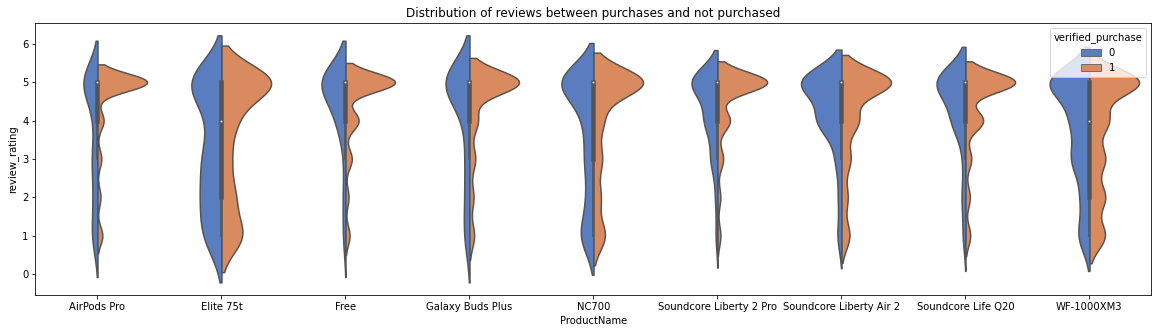

In [220]:

# Index(['Manufacturer', 'ProductName', 'review_rating', 'verified_purchase',
#        'review_date', 'review_title', 'review_text'],
#       dtype='object')

plt.figure(figsize=(20,5))
sns.violinplot(x="ProductName", y="review_rating", hue="verified_purchase",
                    data=amzn_df, palette="muted", split=True).set_title('Distribution of reviews between purchases and not purchased')


Notice in the above chart verified and not purchased reviews are heavily skewed towards 5 star ratings. It seems that most reviews are either going to be 5 or 1 stars, but this tendency doesn't exist for all items. Why do some items show a bimodal distributions and others dont?

[4. 3. 2.]


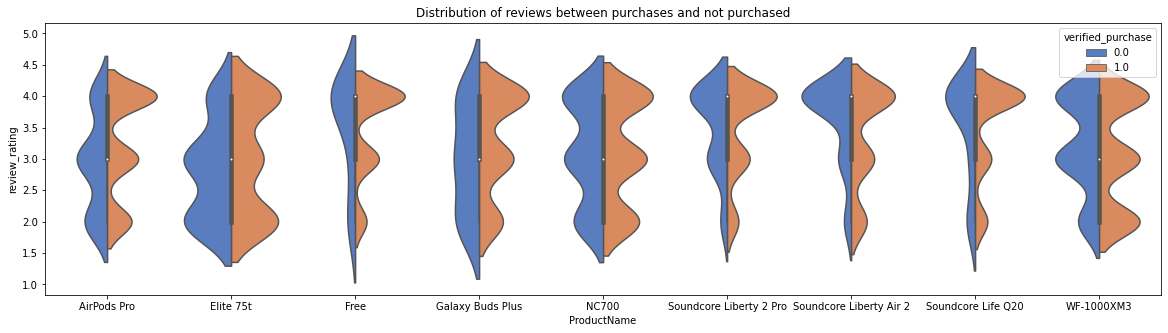

In [221]:
# Let's exclude the 5 and 1 star ratings and see what the violin plot looks like...

filtered_df  = amzn_df.where( (amzn_df['review_rating'] != 5) & (amzn_df['review_rating'] != 1)).dropna()
plt.figure(figsize=(20,5))
sns.violinplot(x="ProductName", y="review_rating", hue="verified_purchase",
                    data=filtered_df, palette="muted", split=True).set_title('Distribution of reviews between purchases and not purchased')

print(filtered_df['review_rating'].unique())

After removing the highest and lowest reviews we see a more evenly distributed set. Most products are evenly distributed... only a few products actually have a skewd distribution. Are the skewed distributions showing good products? To learn more I'll have to dive into the words used for the reviews.

In [222]:
# df = amzn_df[['ProductName','review_rating','verified_purchase','review_date']]

# reviewCounts = amzn_df[['ProductName','review_rating']].rename(columns={'review_rating':'count'})
# reviewCounts = reviewCounts.groupby('ProductName').count().reset_index()

# df['avg'] = df['review_rating']
# df['avg'] = df.apply(lambda row: reviewCounts.where(reviewCounts['ProductName'] == row['ProductName'])['count'],axis=1)
# # df.apply(lambda row: len(reviewCounts.where(df['ProductName'] = row['ProductName']).dropna()),axis=1)
# # reviewCounts
# df

# verifiedPurchase = df.where(df['verified_purchase'] == 1).dropna()
# verifiedPurchase= verifiedPurchase[['ProductName','review_rating']].groupby(['ProductName']).mean().reset_index()
# sns.barplot(x=verifiedPurchase['ProductName'], y=verifiedPurchase['review_rating'])

['AirPods Pro' 'Elite 75t' 'Free' 'Galaxy Buds Plus' 'NC700'
 'Soundcore Liberty 2 Pro' 'Soundcore Liberty Air 2' 'Soundcore Life Q20'
 'WF-1000XM3']


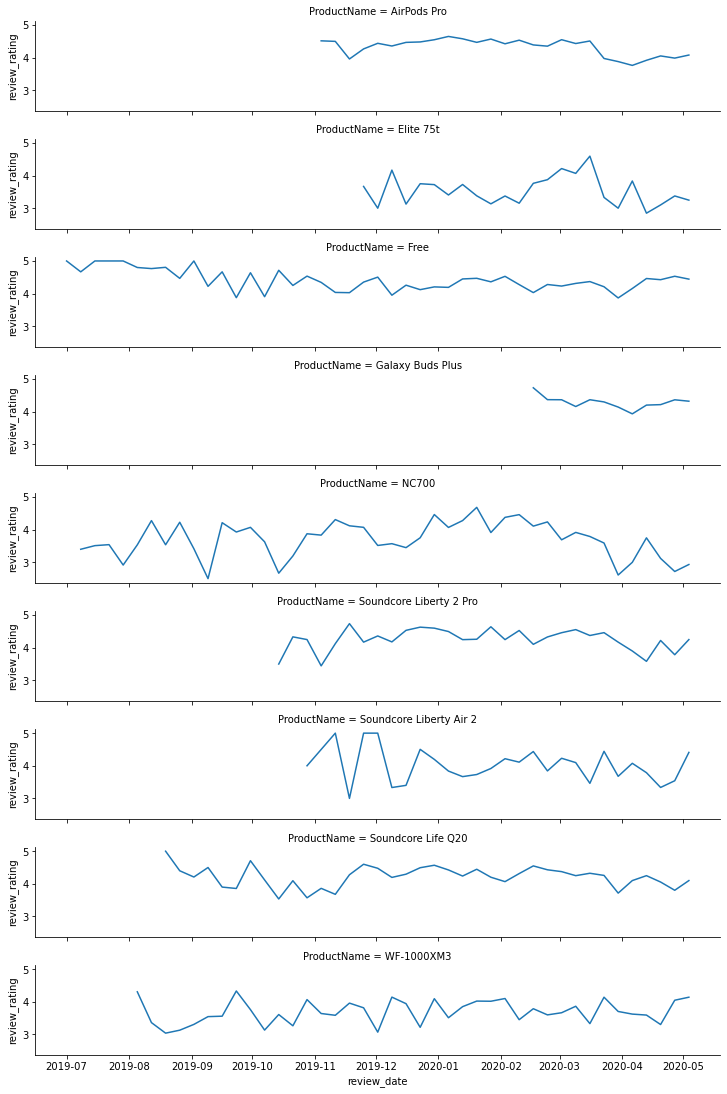

In [238]:
# ['Manufacturer', 'ProductName', 'review_rating', 'verified_purchase',
#        'review_date', 'review_title', 'review_text']
print(amzn_df['ProductName'].unique())

def FormatProductReviewRatingsAndDates(df, productName=None):
    if productName is not None:
        galaxyBuds_df = df.where(df['ProductName'].str.contains(productName)).dropna()
    else:
        galaxyBuds_df = df
    # Let's only look at verified purchases
    galaxyBuds_df = galaxyBuds_df.where(galaxyBuds_df['verified_purchase']== 1).dropna()
    galaxyBuds_df = galaxyBuds_df[['review_date', 'ProductName', 'review_rating']]
    galaxyBuds_df = galaxyBuds_df.groupby(['ProductName','review_date']).mean().reset_index()
    
    # create a new df and merge all of the products together...
    tempdf = None
    for product in galaxyBuds_df['ProductName'].unique():
        df = galaxyBuds_df.where(galaxyBuds_df['ProductName'] == product).dropna()
        df = df.set_index('review_date').resample('W-MON').mean().reset_index()
        df['ProductName'] = df['review_rating'].apply(lambda x: product)
#         print(df.head())
        if tempdf is None:
            tempdf = df
        else:
            tempdf = pd.concat([tempdf, df])
#         tempdf = df
    
    # We lose the product names if we try to do a mean.
#     galaxyBuds_df = galaxyBuds_df.set_index('review_date').resample('W-MON').mean().reset_index()
    return tempdf

# average the reviews on time
# galaxyBuds_df = FormatProductReviewRatingsAndDates(amzn_df, 'Galaxy Buds Plus')

galaxyBuds_df = FormatProductReviewRatingsAndDates(amzn_df)
# galaxyBuds_df

ordered_days = galaxyBuds_df.ProductName
g = sns.FacetGrid(galaxyBuds_df, row="ProductName", height=1.7, aspect=6,)

# g.fig.subplots_adjust(top=0.8)
# g.fig.suptitle('THIS IS A TITLE, YOU BET')
g.map(sns.lineplot, "review_date", "review_rating")



Most of the above charts don't appear to show any kind of trend... there are a few products that might have a difference, but most seem to be evenly balanced month to month...the averages don't seem to change much.

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
text = "This is my text. It icludes commas, question marks? and other stuff. Also U.S..".lower()
tokens = tokenizer.tokenize(text)
tokens

In [ ]:
# String manipulation functions

uselessWords = ['-','‘','nan','***',';','•','–'
                ,'a','are','at','that','an','in','as','these','my','than','for','and', 'i', 'it', 'thats','if','this'
                ,'they','them','to','also','your','will','do','of','it.','is', 'you','the']
def CleanString(s):
    s = s.replace("beautifully","beautiful")
    # replace characters...we could use regex, but this is quick enough
    s = s.replace(r'\n',' ').replace('*','').replace('/ ','/').replace('!','')
    s = s.replace('\"','').replace('“','').replace('”','').replace("\'","")
    s = s.replace(':','').replace(',','').replace('.','').replace('(','').replace(')','').replace('’','')
    return s

def CreateListForColumn(df, textColumn):
    wordColumn = df[textColumn]
    wordColumn = wordColumn.apply(str)
    # clean useless words
    wordColumn = wordColumn.apply(CleanString)
    
    return wordColumn.apply(lambda row: list(filter(lambda a: a not in uselessWords, row.lower().split(" "))))


from collections import defaultdict
def count_frequency(word_list):
    """ Function input: list object contains strings of individual words.
        Function output: defaultdict() object containing {word, frequency} pairs. """

    freq_counts = defaultdict(int)
    
    for word in word_list:
        freq_counts[word] += 1

    return freq_counts

def GetDataframeOfWords(pandasdf, textColumn):
    pandasdf['words'] = CreateListForColumn(pandasdf, 'review_text')
    
    wordArray = pandasdf[pandasdf['words'].map(lambda d: len(d)) > 0]['words'].values
    words = []
    for wordlist in wordArray:
        words.extend(wordlist)
    wordDictionary = count_frequency(words)
    
    df = pd.DataFrame.from_dict(wordDictionary, orient='index',
                       columns=['count']).reset_index()
    df = df.rename(columns={"index": "word"})
    df = df.sort_values(by=['count'], ascending=False)   
#     df = df.set_index('word')
    
    return df
    

In [ ]:
wordCount_df = amzn_df.copy()

# wordCount_df['review_text'] = wordCount_df['review_text'].apply(str)
# pre parse the words and separate them into a list

# wordCount_df['review_text_split'] = wordCount_df['review_text'].apply(lambda row: list(filter(lambda a: a not in uselessWords, row.lower().split(" "))))


# wordCount_df['review_text_split'] = wordCount_df['review_text'].apply(lambda row: row.split(" "))



# wordCount_df['review_text_split'][:50].apply(lambda x: pd.value_counts(x)).sum(axis = 0).sort_values(ascending = False)

# Filter out ratings into levels low neutral or high
wordCount_lowRating_df = wordCount_df.where((wordCount_df['review_rating'] == 1) | (wordCount_df['review_rating'] == 2))
wordCount_highRating_df = wordCount_df.where((wordCount_df['review_rating'] == 4) | (wordCount_df['review_rating'] == 5))


onestar_df = GetDataframeOfWords(wordCount_lowRating_df, 'review_text')
onestar_df =  onestar_df.where(onestar_df['count'] != 1).dropna()
highratings_df = GetDataframeOfWords(wordCount_highRating_df, 'review_text')



# wordCount_df
rankings = pd.merge(highratings_df,onestar_df,on='word', how ='outer').rename(columns={'count_x':'highRankingCount','count_y':'lowRankingCount'})
# rankings.where()

highRankingOnlyWords = rankings[np.isnan(rankings['lowRankingCount'])]


rankings[np.isnan(rankings['highRankingCount'])]
# rankings['Col2'].isnull()
# onestar_df
# count_frequency(wordCount_df['words'].values)
# amzn_df.head()
# wordCount_df['review_text']

In [ ]:
df = pd.DataFrame.from_dict(wordDictionary, orient='index',
                       columns=['count']).reset_index()
df = df.rename(columns={"index": "word"})
df = df.sort_values(by=['count'], ascending=False)
df
# for word in wordDictionary:
#     print(word + ' ' + str(wordDictionary[word]) )